# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:
#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time Series Analysis: Decomposition
#### 4. Testing for Stationality
#### 5. Stationarizing the Data
#### 6. Time Series Analysis Additional Data Set
#### 7. Bonus Task
#### 8. Bonus Task Additional Data Set

## 1. Importing Libraries and Data

In [1]:
conda install quandl


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [--no-plugins] [-V] COMMAND ...
conda-script.py: error: unrecognized arguments: quandl


In [3]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [5]:
%matplotlib inline

In [6]:
path = r"D:\Users\Marlo\OneDrive\OneDrive - South Washington County Schools\Home\job support\Coursework\Achievement 6\Disability Statistics"

In [7]:
dis_pop = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Disability US Population.csv'))

In [8]:
tot_pop = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Total US Population.csv'))

In [9]:
dis_pop.head(5)

,DATE,LNU00074597
0,2008-06-01,27373
1,2008-07-01,27743
2,2008-08-01,27820
3,2008-09-01,27756
4,2008-10-01,27149


In [10]:
dis_pop.shape

(187, 2)

In [11]:
dis_pop.columns

Index(['DATE', 'LNU00074597'], dtype='object')

In [12]:
type(dis_pop)

pandas.core.frame.DataFrame

## 2. Subsetting, wrangling, and cleaning time-series data

In [13]:
dis_pop.head()

,DATE,LNU00074597
0,2008-06-01,27373
1,2008-07-01,27743
2,2008-08-01,27820
3,2008-09-01,27756
4,2008-10-01,27149


In [14]:
#rename column
dis_pop = dis_pop.rename(columns = {'LNU00074597' : 'population'})
dis_pop.head()

,DATE,population
0,2008-06-01,27373
1,2008-07-01,27743
2,2008-08-01,27820
3,2008-09-01,27756
4,2008-10-01,27149


In [15]:
# Set the "Date" column as the index

from datetime import datetime

dis_pop['datetime'] = pd.to_datetime(dis_pop['DATE']) # Create a datetime column from "DATE."
dis_pop = dis_pop.set_index('datetime') # Set the datetime as the index of the dataframe.
dis_pop.drop(['DATE'], axis=1, inplace=True) # Drop the "Date" column.
dis_pop.head()

,population
datetime,
2008-06-01,27373
2008-07-01,27743
2008-08-01,27820
2008-09-01,27756
2008-10-01,27149


I am selecting the years 2008-2023 because those are the dates available. I am not doing a subset.

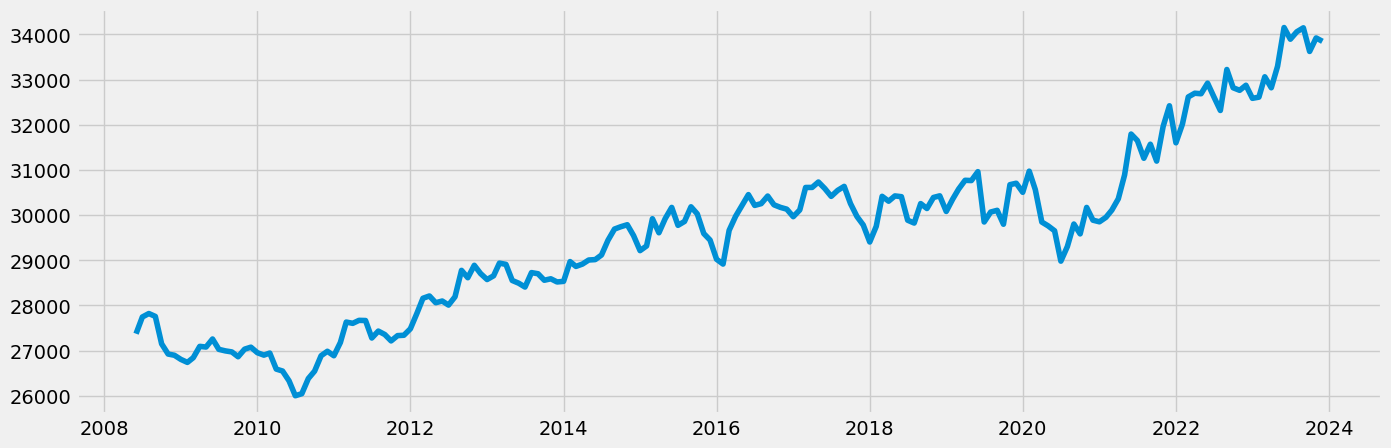

In [16]:
plt.figure(figsize=(15,5), dpi=100) 
    

plt.plot(dis_pop)

In [17]:
#Check for Missing Values
dis_pop.isnull().sum()

population    0
dtype: int64

In [18]:
#Smooth Data

# Calculate moving average with a window size of 6
dis_pop_mov = dis_pop['population'].rolling(window=6)

dis_pop_mov = dis_pop_mov.mean()

print(dis_pop_mov.head(10))

datetime
2008-06-01             NaN
2008-07-01             NaN
2008-08-01             NaN
2008-09-01             NaN
2008-10-01             NaN
2008-11-01    27460.666667
2008-12-01    27381.166667
2009-01-01    27224.666667
2009-02-01    27044.333333
2009-03-01    26892.000000
Name: population, dtype: float64


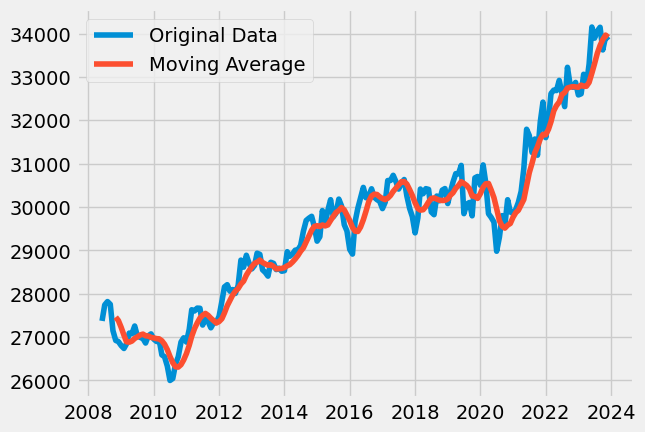

In [19]:
# Plot original data and moving averages
plt.plot(dis_pop['population'], label='Original Data')
plt.plot(dis_pop_mov, label='Moving Average')
plt.legend()
plt.show()

In [20]:
dis_pop_mov.dropna(inplace = True)

In [21]:
#Assign column names to existing DataFrame
column_names=([["population"]])
dis_pop_mov.columns = column_names
print(dis_pop_mov)

datetime
2008-11-01    27460.666667
2008-12-01    27381.166667
2009-01-01    27224.666667
2009-02-01    27044.333333
2009-03-01    26892.000000
                  ...     
2023-08-01    33546.666667
2023-09-01    33727.333333
2023-10-01    33861.500000
2023-11-01    33966.000000
2023-12-01    33915.166667
Name: population, Length: 182, dtype: float64


There is a missing column name so I cannot use this for the time-series analysis.

## 3. Time-Series Analysis: Decomposition

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(dis_pop, model='additive')

In [23]:
from pylab import rcParams # This will define a fixed size for all special charts.\n",

rcParams['figure.figsize'] = 18, 7

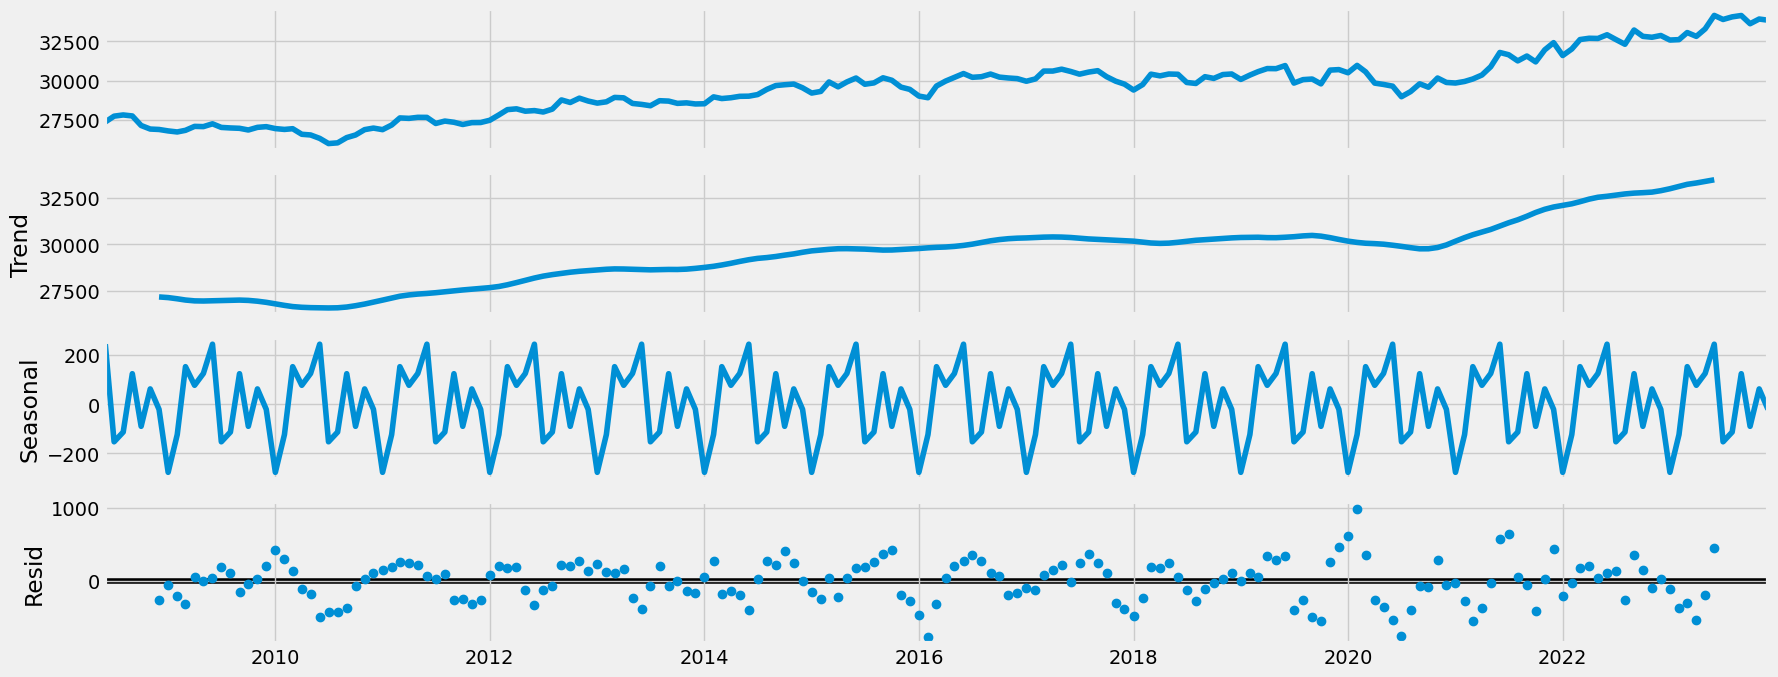

In [24]:
# Plot the separate components

decomposition.plot()
plt.show()

- According to the trend, the population of disabled people in the U.S. has increased since 2008 with the exception being a slight decline in spring of 2020. 
- There is seasonality in this data.
- The data fluctuates a lot but especially in 2020. 

## 4. Testing for Stationarity

In [25]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(dis_pop['population'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.312636
p-value                          0.977917
Number of Lags Used              9.000000
Number of Observations Used    177.000000
Critical Value (1%)             -3.467845
Critical Value (5%)             -2.878012
Critical Value (10%)            -2.575551
dtype: float64


- The test statistic is larger than the critical value so the null hypothesis (the presence of a unit root making a time series non-stationary) cannot be rejected. Additional work to stationarize the data is needed.

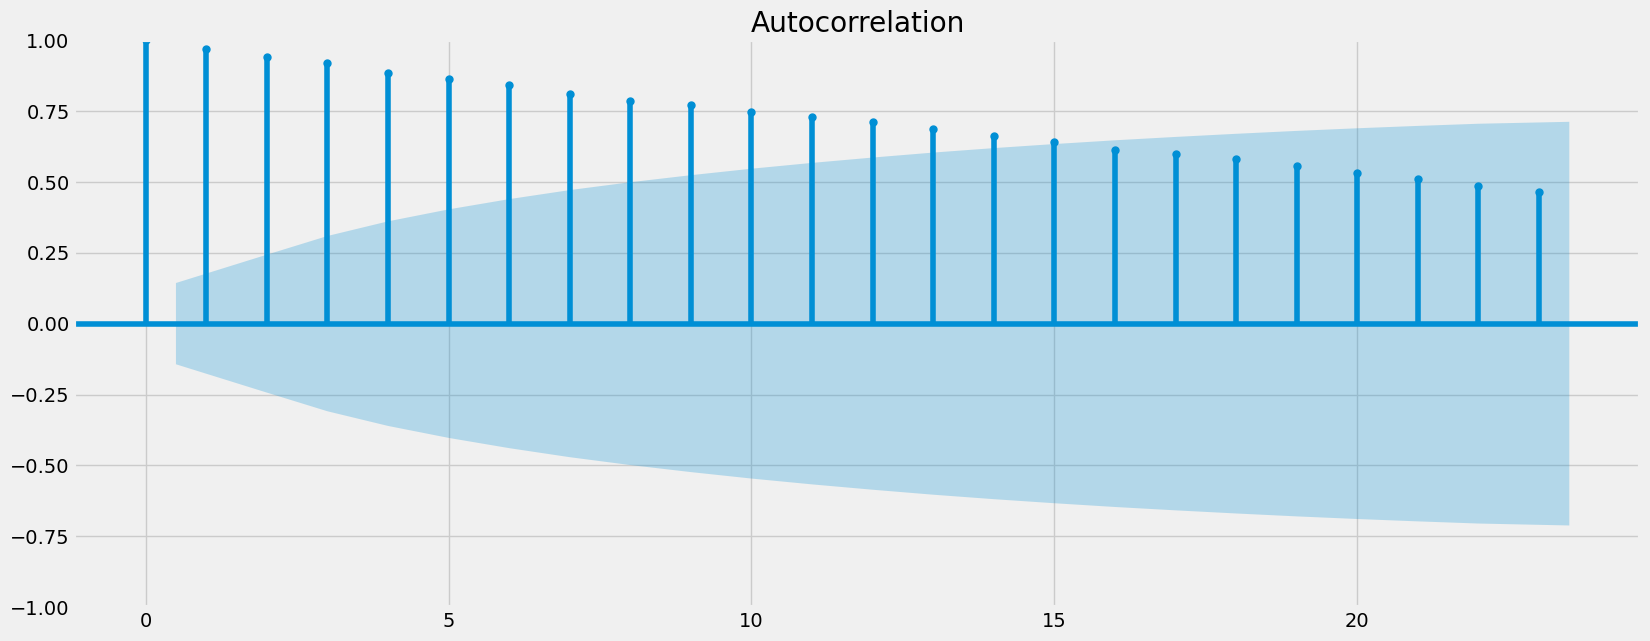

In [26]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(dis_pop)
plt.show()

- There are more than 10 significant lags so a round of differencing is needed.

## 5. Stationarizing the Data

In [27]:
dis_diff = dis_pop - dis_pop.shift(1) 

In [28]:
dis_diff.dropna(inplace = True)

In [29]:
dis_diff.head()

,population
datetime,
2008-07-01,370.0
2008-08-01,77.0
2008-09-01,-64.0
2008-10-01,-607.0
2008-11-01,-226.0


In [30]:
dis_diff.columns

Index(['population'], dtype='object')

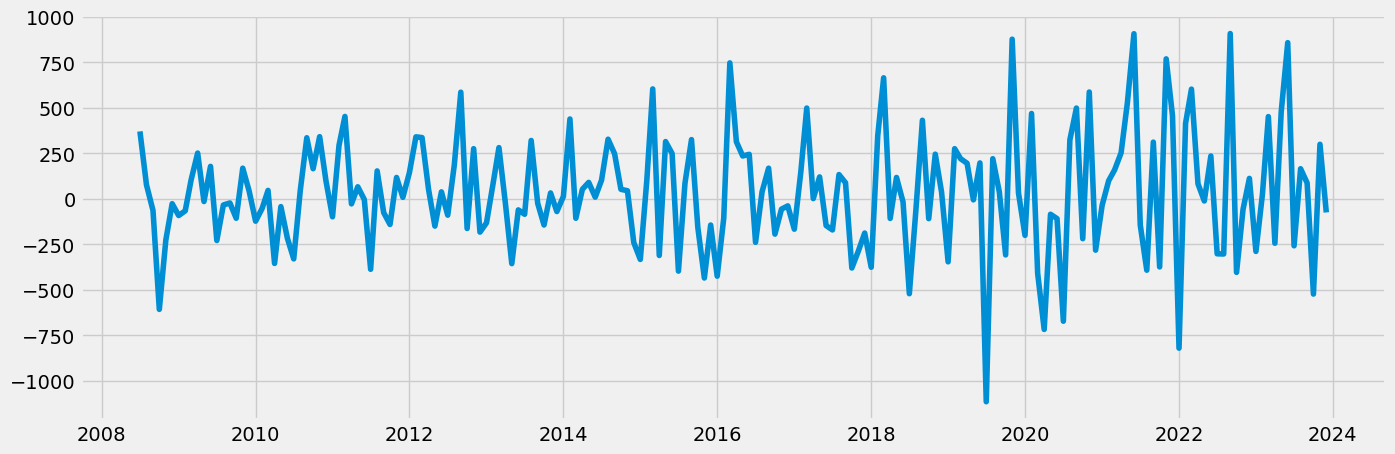

In [31]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(dis_diff)

In [32]:
dickey_fuller(dis_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -5.158180
p-value                          0.000011
Number of Lags Used              8.000000
Number of Observations Used    177.000000
Critical Value (1%)             -3.467845
Critical Value (5%)             -2.878012
Critical Value (10%)            -2.575551
dtype: float64


- The test statistic is smaller than the critical value so the null hypothesis (the presence of a unit root making a time series non-stationary) can be rejected. The data is now considered stationary.

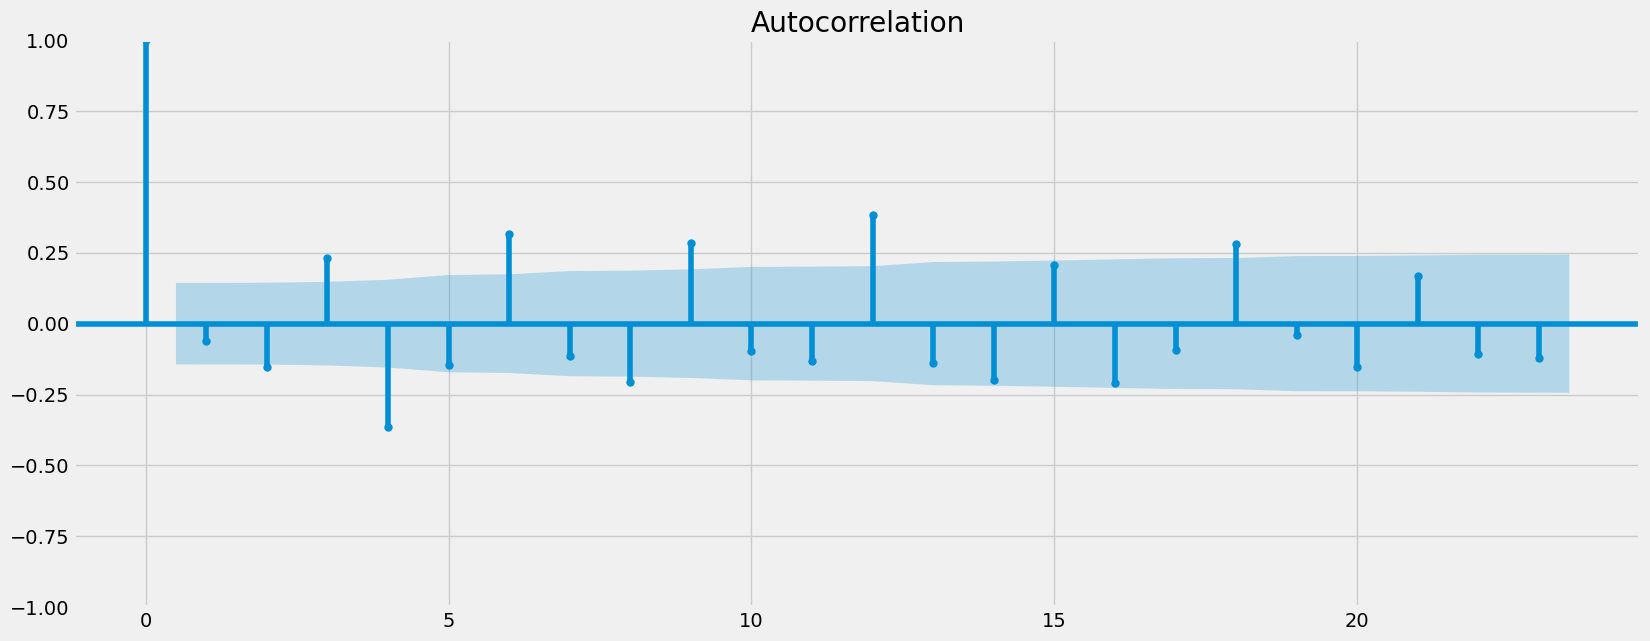

In [33]:
plot_acf(dis_diff)
plt.show()

- There are less than 10 significant lags so no more differencing is needed.

## 6. Time Series Analysis Additional Data Set

In [34]:
tot_pop.head()

,DATE,POPTOTUSA647NWDB
0,2008-01-01,304093966
1,2009-01-01,306771529
2,2010-01-01,309327143
3,2011-01-01,311583481
4,2012-01-01,313877662


In [36]:
tot_pop.shape

(15, 2)

In [37]:
tot_pop.columns

Index(['DATE', 'POPTOTUSA647NWDB'], dtype='object')

In [39]:
type(tot_pop)

pandas.core.frame.DataFrame

In [40]:
#rename column
tot_pop = tot_pop.rename(columns = {'POPTOTUSA647NWDB' : 'population'})
tot_pop.head()

,DATE,population
0,2008-01-01,304093966
1,2009-01-01,306771529
2,2010-01-01,309327143
3,2011-01-01,311583481
4,2012-01-01,313877662


In [41]:
# Set the "Date" column as the index

from datetime import datetime

tot_pop['datetime'] = pd.to_datetime(tot_pop['DATE']) # Create a datetime column from "DATE."
tot_pop = tot_pop.set_index('datetime') # Set the datetime as the index of the dataframe.
tot_pop.drop(['DATE'], axis=1, inplace=True) # Drop the "Date" column.
tot_pop.head()

,population
datetime,
2008-01-01,304093966
2009-01-01,306771529
2010-01-01,309327143
2011-01-01,311583481
2012-01-01,313877662


A subset is not needed because I only downloaded the years 2008-2022 to match the data for the disability population.

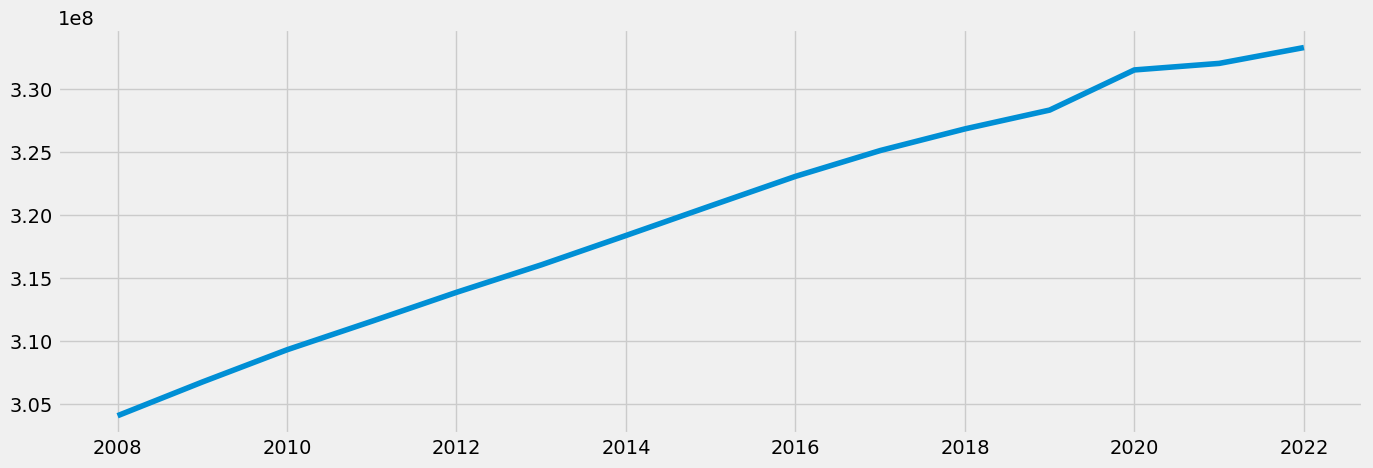

In [42]:
plt.figure(figsize=(15,5), dpi=100) 
    

plt.plot(tot_pop)

In [44]:
#Check for Missing Values
tot_pop.isnull().sum()

population    0
dtype: int64

In [45]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(tot_pop, model='additive')

In [46]:
from pylab import rcParams # This will define a fixed size for all special charts.\n",

rcParams['figure.figsize'] = 18, 7

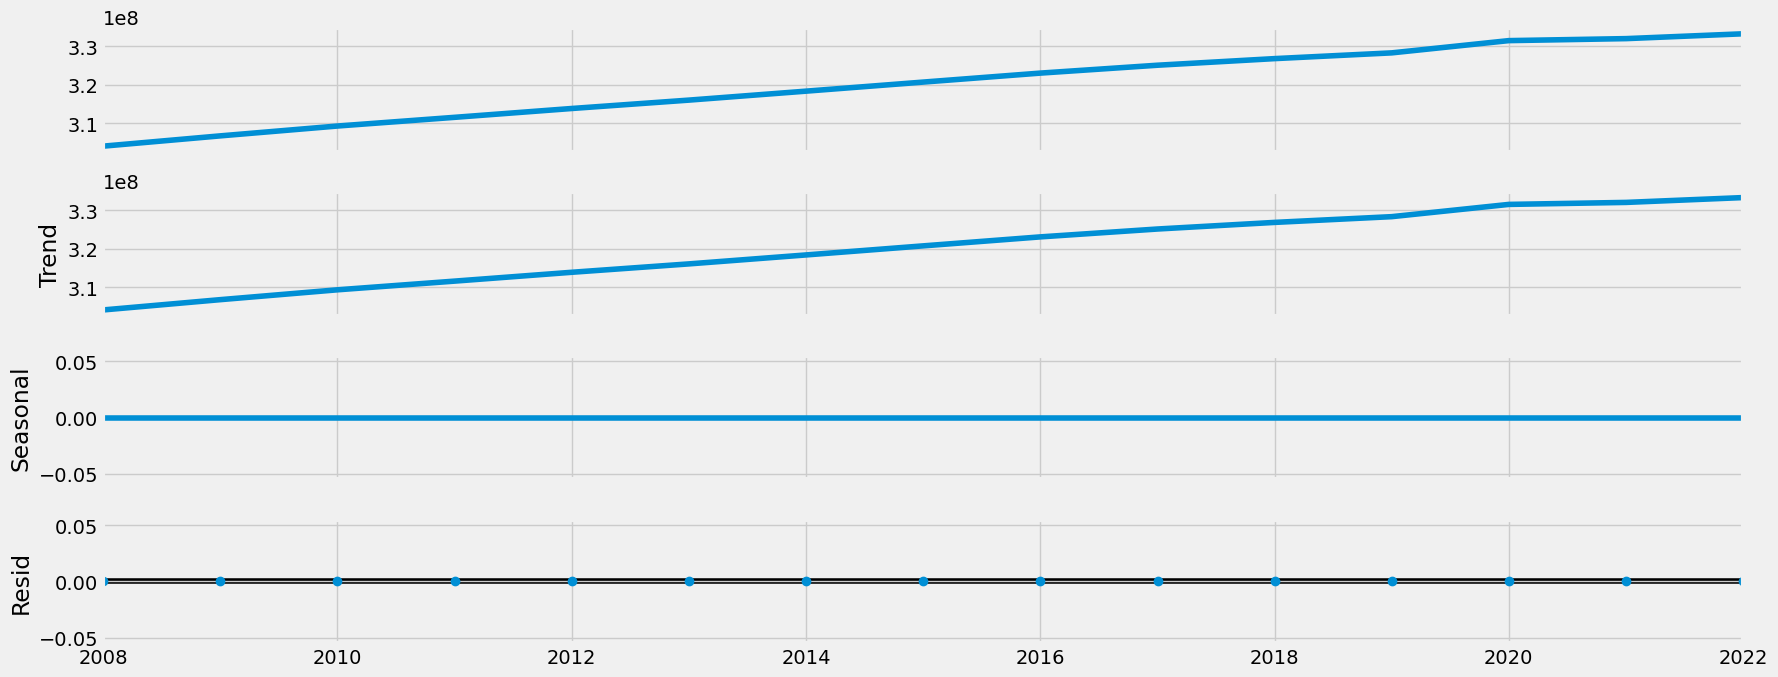

In [47]:
# Plot the separate components

decomposition.plot()
plt.show()

- The original data and trend data look the same.
- There does not appear to be any seasonality in this data. There are only 15 data points though taken yearly so that is probably related.
- There is no noise.

In [48]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(tot_pop['population'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.608626
p-value                        0.091227
Number of Lags Used            5.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


- The test statistic is not higher than the critical value so the null hypothesis cannot be rejected and differencing needs to be done.

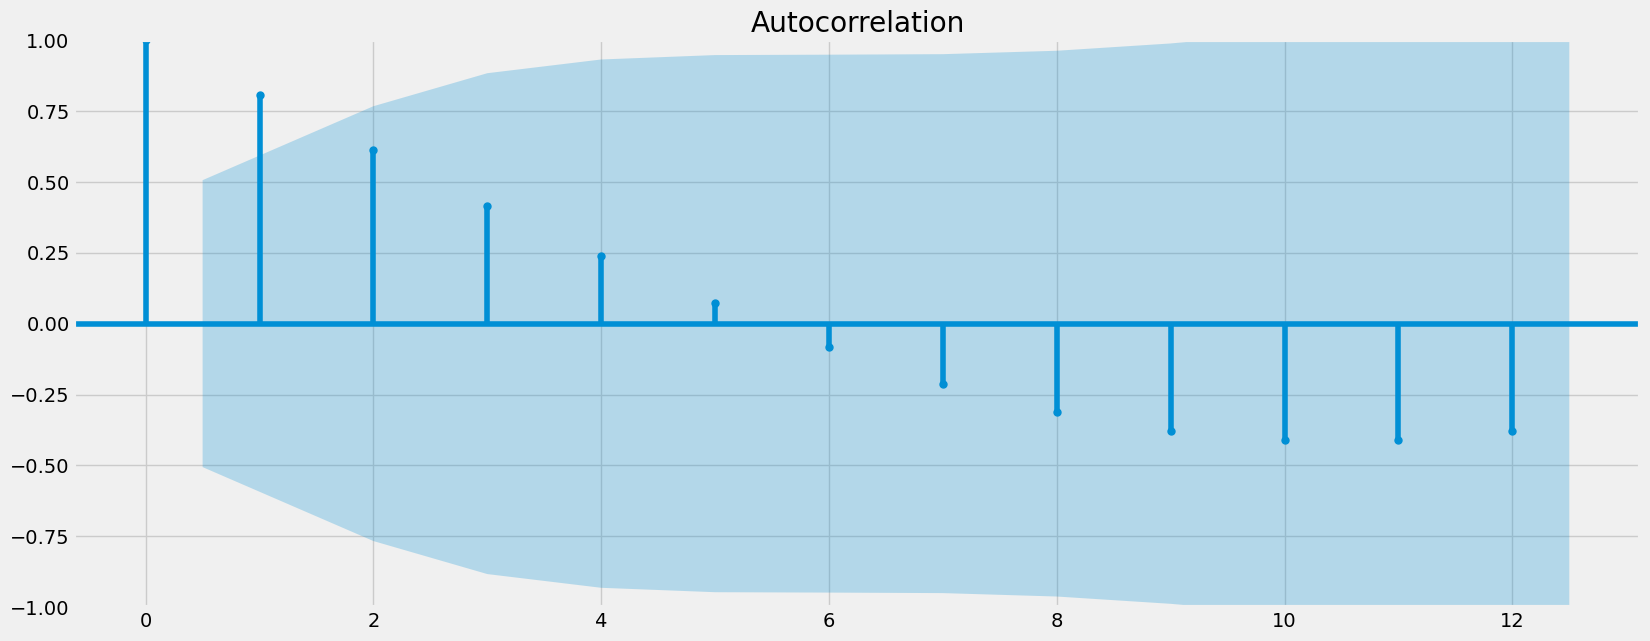

In [49]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(tot_pop)
plt.show()

- There are only 2 lags which is good.

In [50]:
tot_diff = tot_pop - tot_pop.shift(1) 

In [51]:
tot_diff.dropna(inplace = True)

In [52]:
tot_diff.head()

,population
datetime,
2009-01-01,2677563.0
2010-01-01,2555614.0
2011-01-01,2256338.0
2012-01-01,2294181.0
2013-01-01,2182285.0


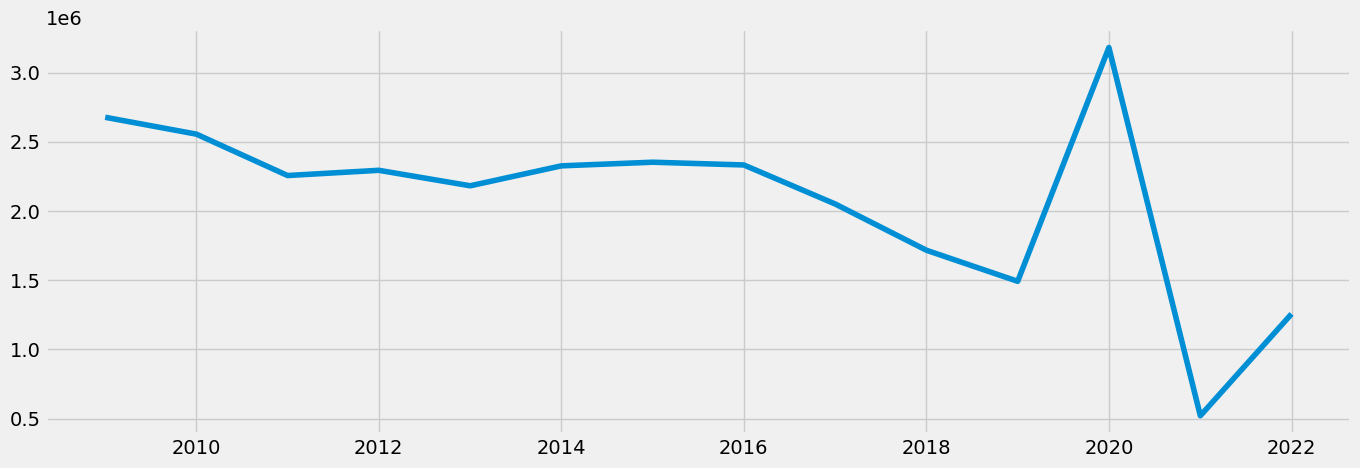

In [53]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(tot_diff)

In [54]:
dickey_fuller(tot_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -0.453427
p-value                        0.900789
Number of Lags Used            5.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


- The test statistic is still lower than the critical value so the null hypothesis still cannot be rejected and differencing needs to be done again.

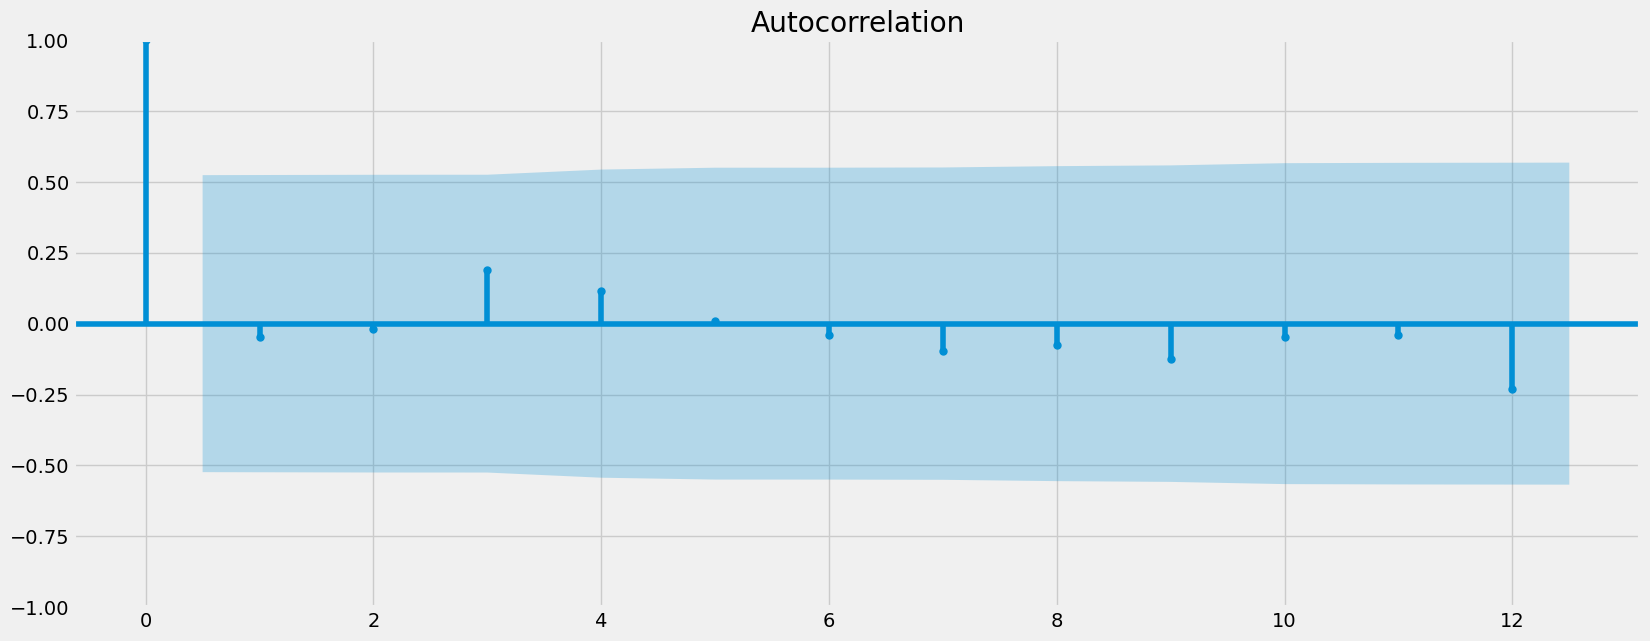

In [55]:
plot_acf(tot_diff)
plt.show()

- There is only 1 lag so this is good.

In [56]:
tot_diff2 = tot_diff - tot_diff.shift(1) 

In [57]:
tot_diff2.dropna(inplace = True)

In [58]:
tot_diff2.head()

,population
datetime,
2010-01-01,-121949.0
2011-01-01,-299276.0
2012-01-01,37843.0
2013-01-01,-111896.0
2014-01-01,144097.0


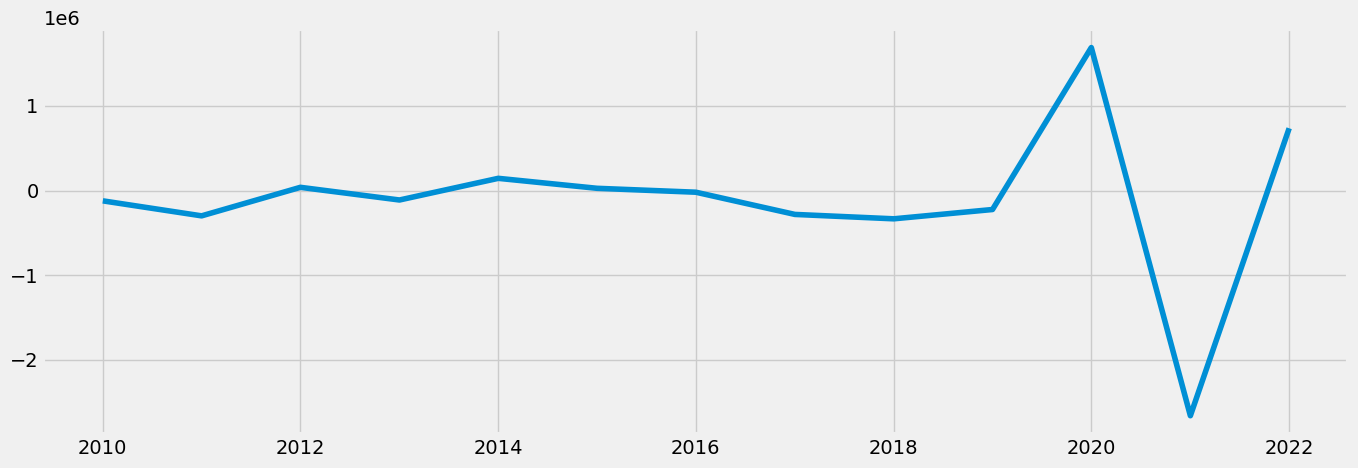

In [59]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(tot_diff2)

In [60]:
dickey_fuller(tot_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -2.079088
p-value                        0.253006
Number of Lags Used            4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


- The test statistic is still lower than the critical value so the null hypothesis cannot be rejected and differencing is needed again. 

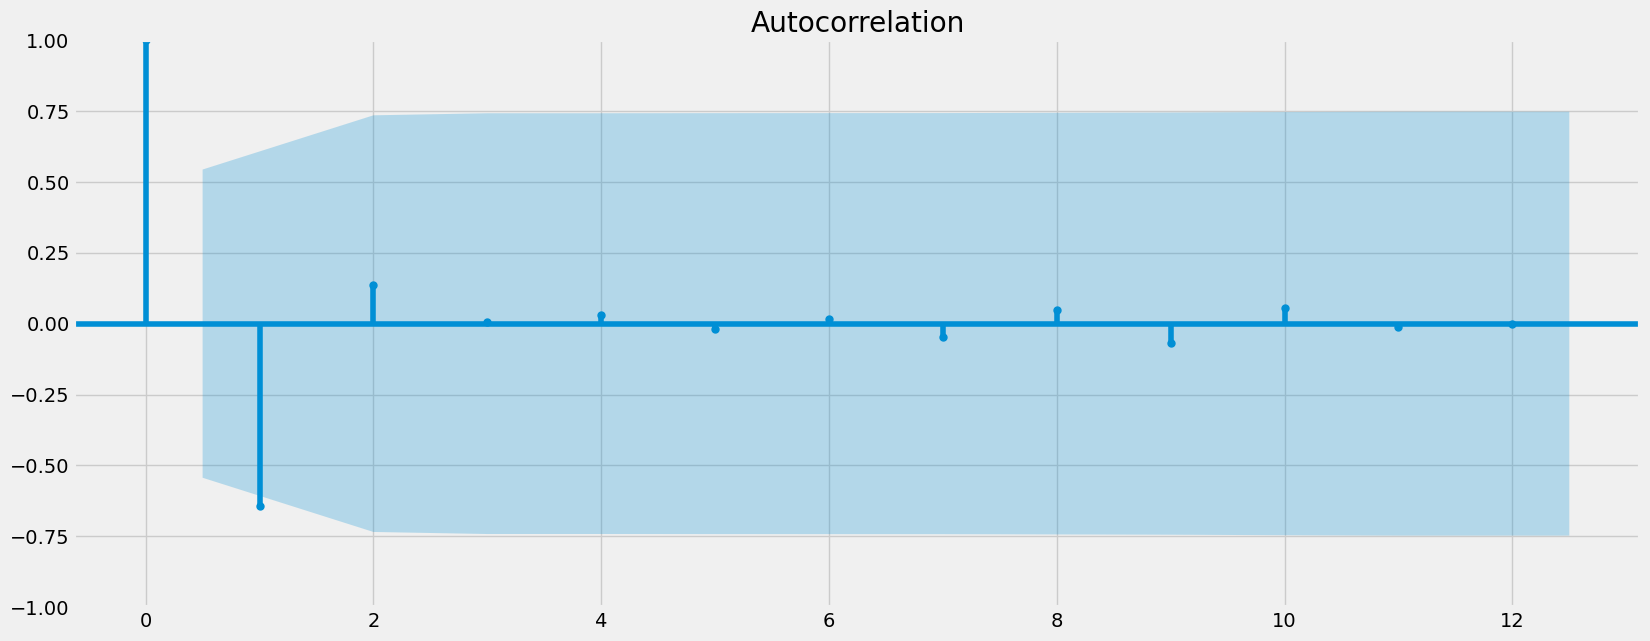

In [61]:
plot_acf(tot_diff2)
plt.show()

- There is only 1 lag so this is good.

In [62]:
tot_diff3 = tot_diff2 - tot_diff2.shift(1) 

In [63]:
tot_diff3.dropna(inplace = True)

In [64]:
tot_diff3.head()

,population
datetime,
2011-01-01,-177327.0
2012-01-01,337119.0
2013-01-01,-149739.0
2014-01-01,255993.0
2015-01-01,-117814.0


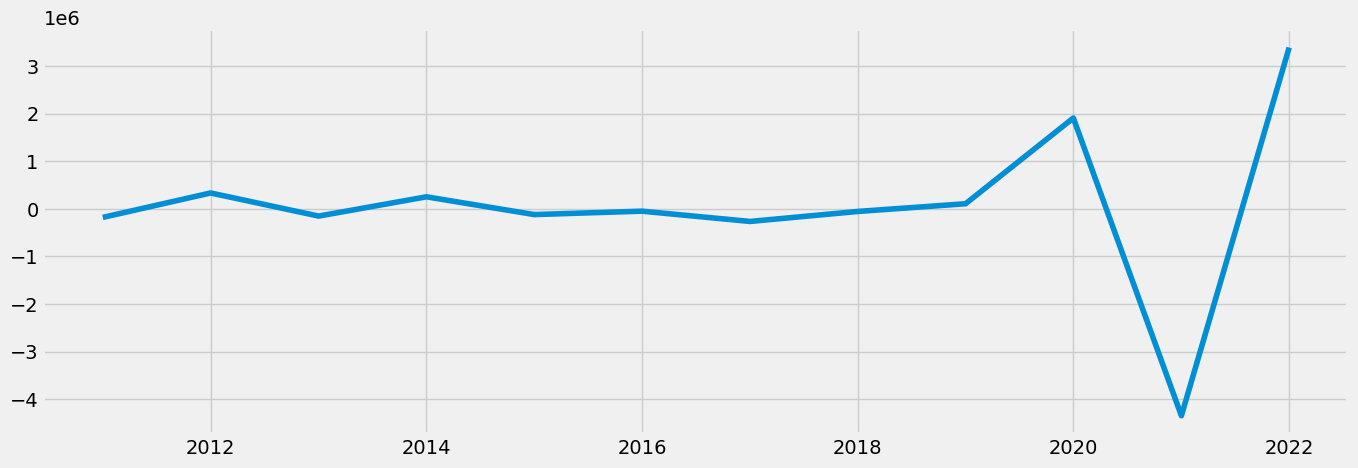

In [65]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(tot_diff3)

In [66]:
dickey_fuller(tot_diff3)

Dickey-Fuller Stationarity test:
Test Statistic                -3.319832
p-value                        0.014015
Number of Lags Used            2.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


- The test statistic is higher than the 5% and 10% critical value so the null hypothesis can be rejected and the data is considered stationary.

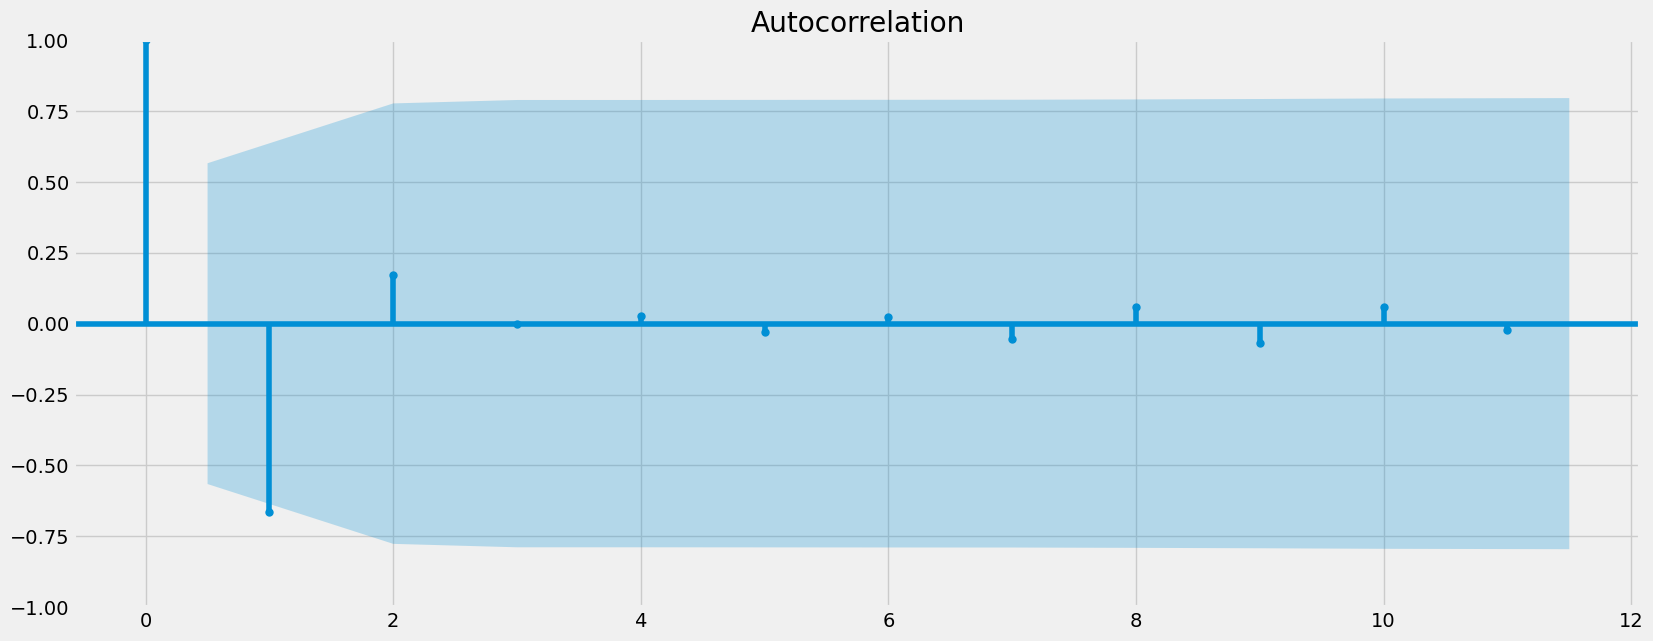

In [67]:
plot_acf(tot_diff3)
plt.show()

- There are 2 lags so this is good.

## 7. Bonus Task

#### 7a. Defining Parameters
#### 7b. Splitting the Data
#### 7c. Running and Fitting the Model
#### 7d. Iterating

## 7a. Defining Parameters

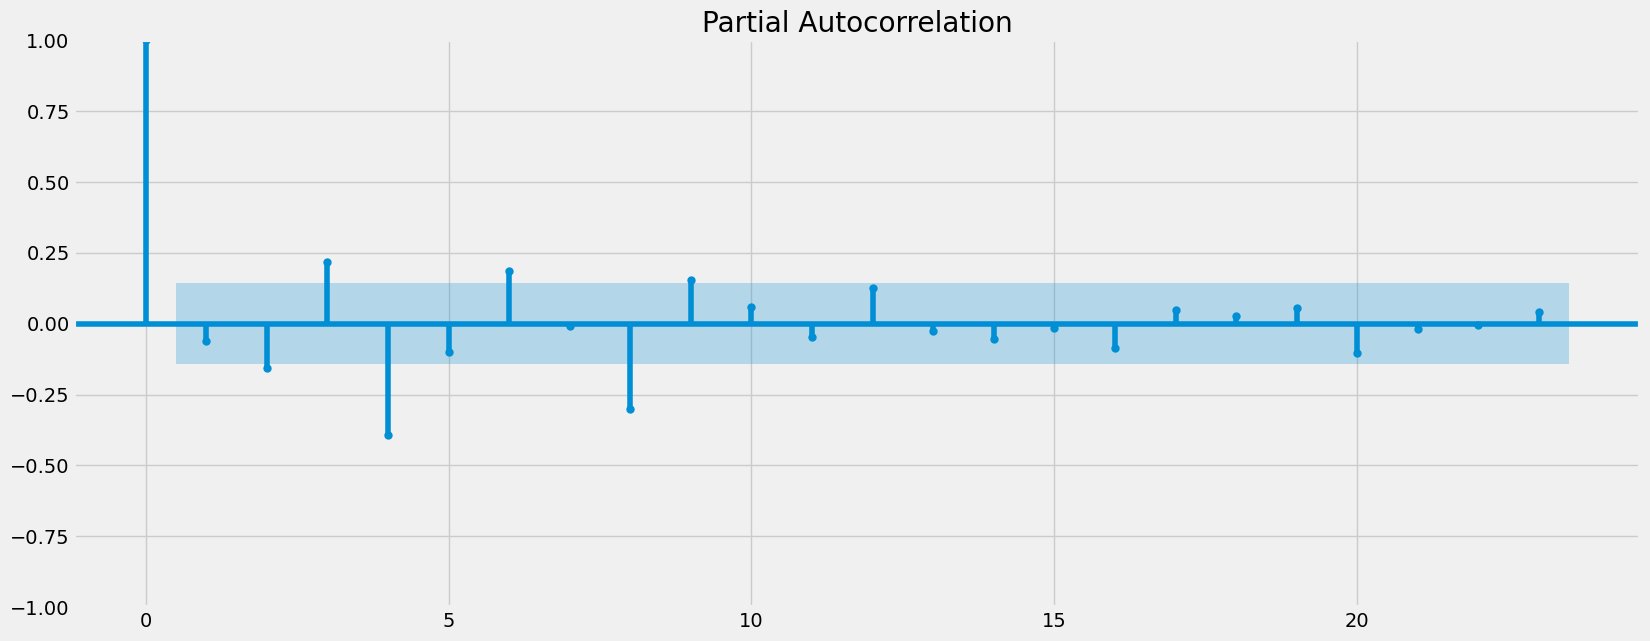

<Figure size 4500x4500 with 0 Axes>

In [113]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(dis_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

- There are 7 lags so I will half that and do p=3.

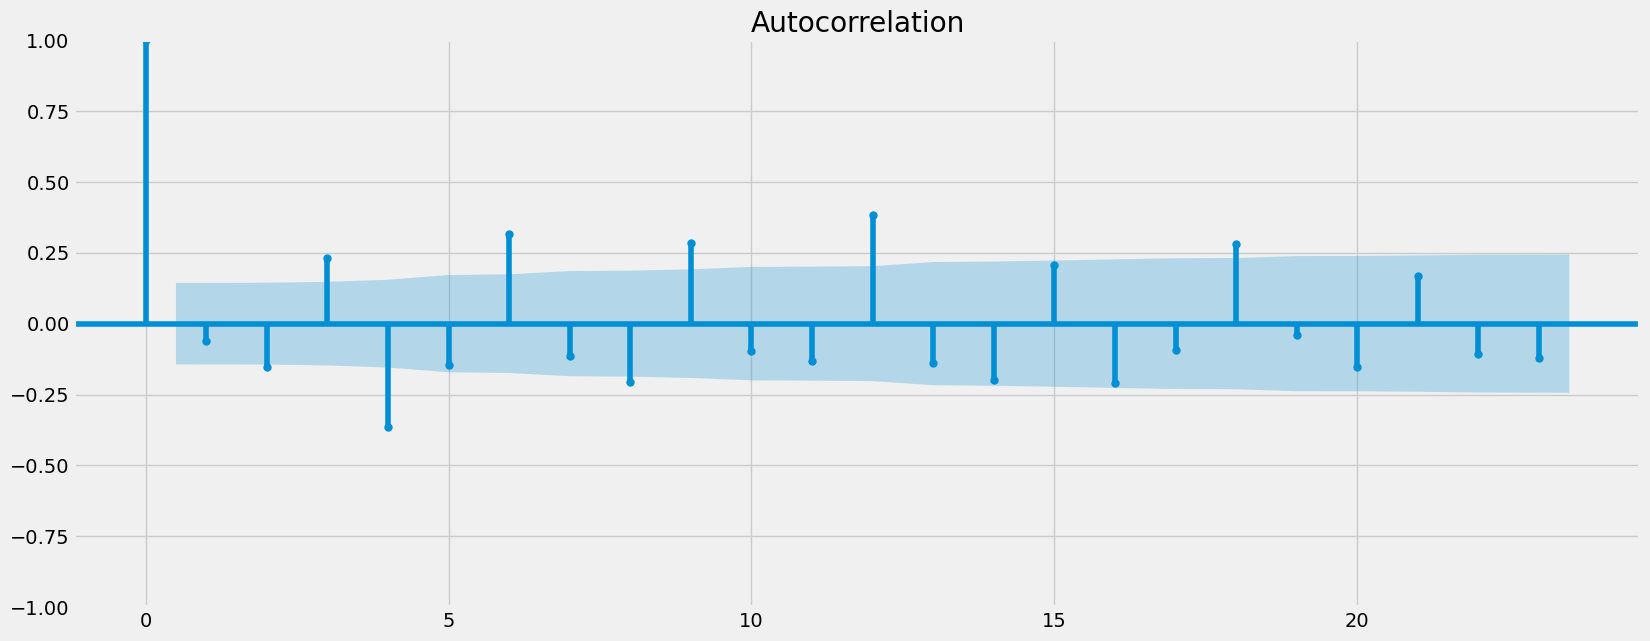

<Figure size 1500x500 with 0 Axes>

In [71]:
# Plot autocorrelations to determine parameter q

plot_acf(dis_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

- There are 9 lags so I will half that and do q=4.

## 7b. Splitting the Data

In [91]:
# Split the data

train = dis_diff['population'][:130]
test = dis_diff['population'][130:]

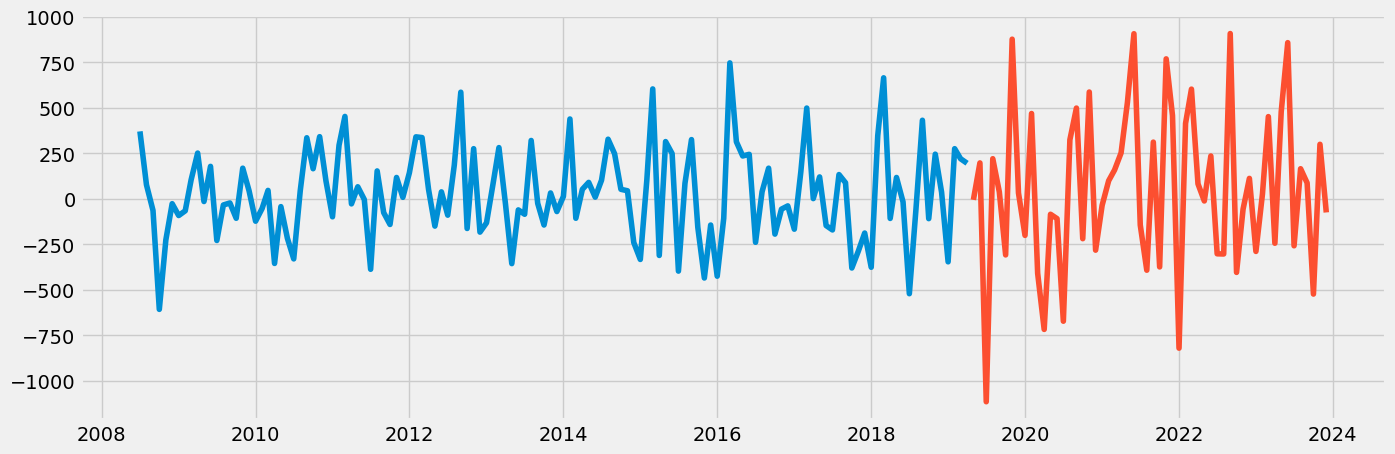

In [92]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [93]:
test.shape

(56,)

## 7c. Running and Fitting the Model

In [94]:
from statsmodels.tsa.api import ARIMA 

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                  130
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -880.410
Date:                Sun, 21 Jan 2024   AIC                           1776.819
Time:                        19:25:23   BIC                           1799.698
Sample:                    07-01-2008   HQIC                          1786.115
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8082      0.269     -3.006      0.003      -1.335      -0.281
ar.L2         -0.9254      0.199     -4.647      0.000      -1.316      -0.535
ar.L3         -0.1050      0.253     -0.415      0.6

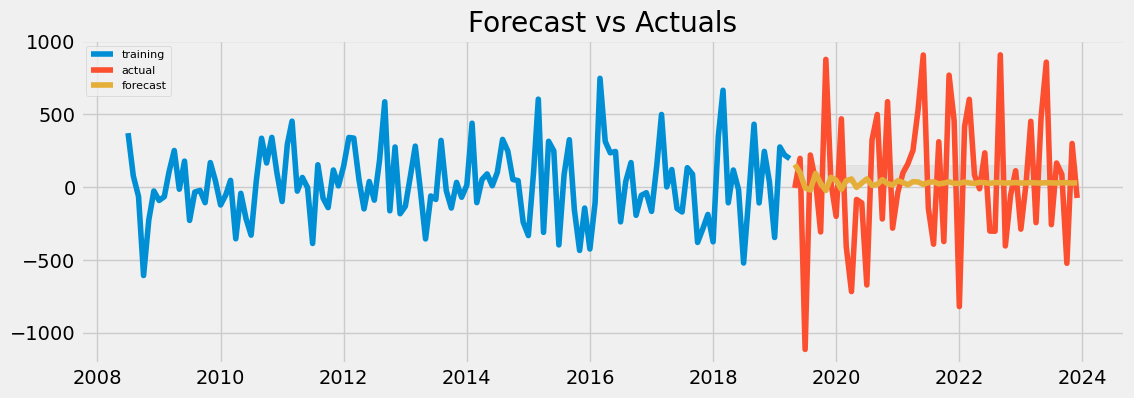

In [95]:
model = ARIMA(train, order=(3, 1, 4))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(56, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[55], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Very few of the values are significant and while the forecast goes down the middle of where the data lies, the confidence interval does not include all of the data.

## 7d. Iterating

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                  130
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -893.750
Date:                Sun, 21 Jan 2024   AIC                           1797.500
Time:                        19:27:30   BIC                           1811.799
Sample:                    07-01-2008   HQIC                          1803.310
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1542      0.097      1.595      0.111      -0.035       0.344
ar.L2         -0.1561      0.081     -1.919      0.055      -0.316       0.003
ar.L3          0.0936      0.100      0.934      0.3

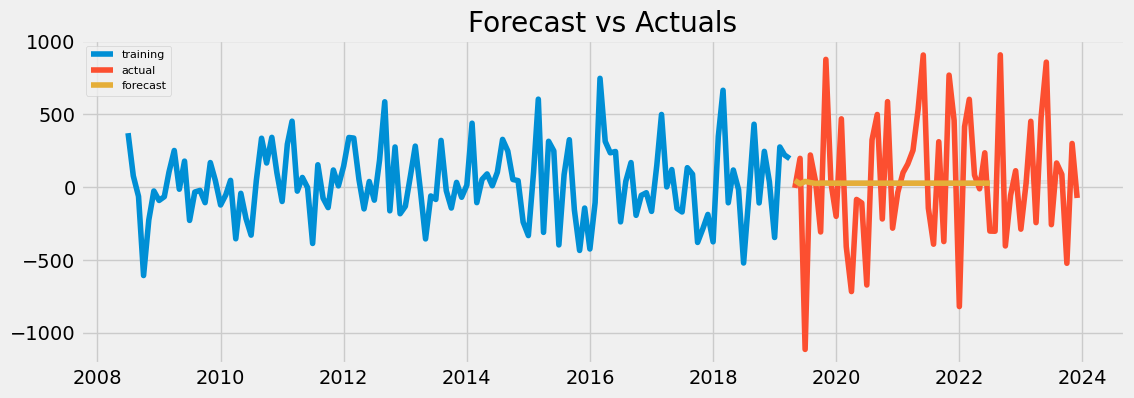

In [96]:
model = ARIMA(train, order=(3, 1, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(39, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[38], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

- There are more values that are significant but not all. The confidence interval does not include all of the data.

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                  147
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1014.703
Date:                Sun, 21 Jan 2024   AIC                           2043.406
Time:                        19:11:23   BIC                           2064.292
Sample:                    07-01-2008   HQIC                          2051.893
                         - 09-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0675      0.079      0.859      0.390      -0.087       0.222
ar.L2         -0.1604      0.091     -1.766      0.077      -0.338       0.018
ar.L3          0.1655      0.086      1.929      0.0

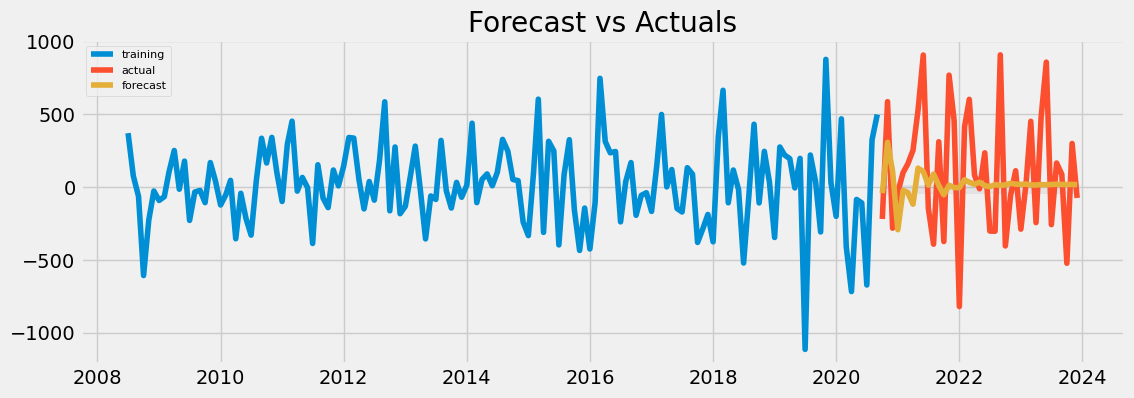

In [84]:
model = ARIMA(train, order=(5, 1, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(39, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[38], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This is slightly worse.

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                  130
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -890.541
Date:                Sun, 21 Jan 2024   AIC                           1793.082
Time:                        19:35:42   BIC                           1810.241
Sample:                    07-01-2008   HQIC                          1800.054
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4449      0.252     -1.764      0.078      -0.939       0.049
ar.L2         -0.0801      0.115     -0.695      0.487      -0.306       0.146
ar.L3          0.0988      0.121      0.818      0.4

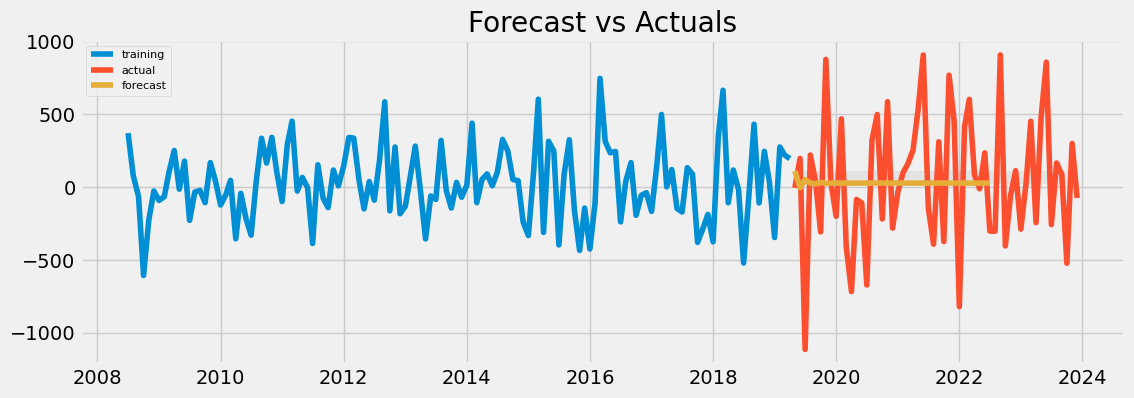

In [101]:
model = ARIMA(train, order=(3, 1, 2))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(39, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[38], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This still doesn't work.

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                  147
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1013.152
Date:                Sun, 21 Jan 2024   AIC                           2042.305
Time:                        19:12:26   BIC                           2066.174
Sample:                    07-01-2008   HQIC                          2052.003
                         - 09-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3167      0.322     -0.983      0.326      -0.948       0.315
ar.L2         -0.1060      0.109     -0.975      0.330      -0.319       0.107
ar.L3          0.0836      0.099      0.846      0.3

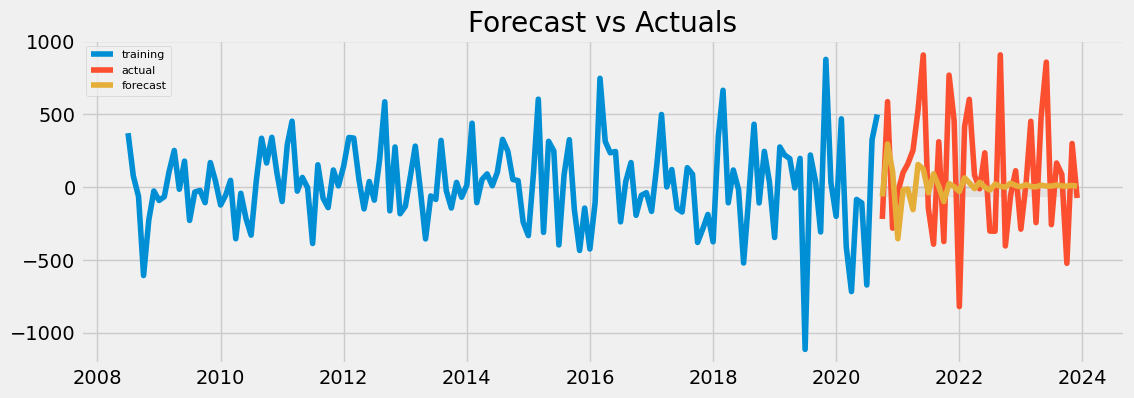

In [86]:
model = ARIMA(train, order=(5, 1, 2))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(39, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[38], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This still doesn't work.

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                  130
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -881.558
Date:                Sun, 21 Jan 2024   AIC                           1777.115
Time:                        19:38:18   BIC                           1797.134
Sample:                    07-01-2008   HQIC                          1785.249
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2165      0.239      0.908      0.364      -0.251       0.684
ar.L2         -0.2291      0.086     -2.660      0.008      -0.398      -0.060
ar.L3          0.1554      0.102      1.528      0.1

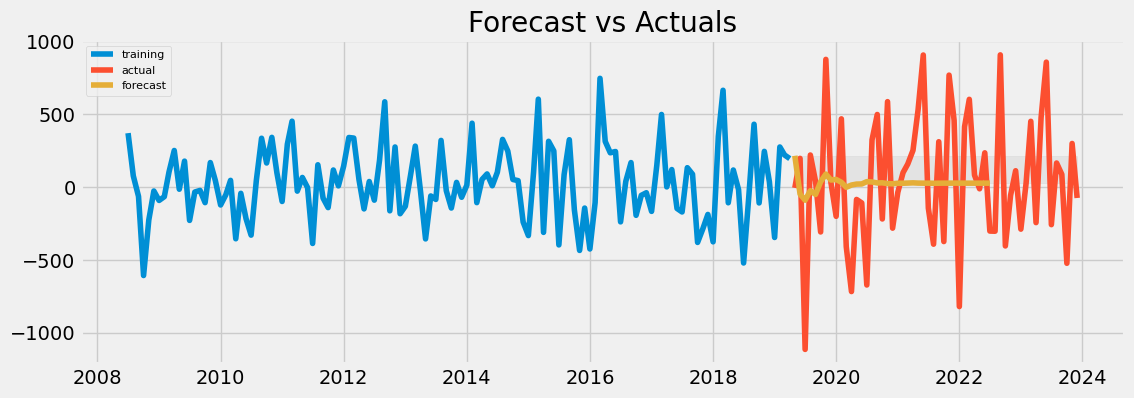

In [102]:
model = ARIMA(train, order=(4, 1, 2))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(39, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[38], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This still doesn't work.

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                  130
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -881.564
Date:                Sun, 21 Jan 2024   AIC                           1775.128
Time:                        19:39:09   BIC                           1792.287
Sample:                    07-01-2008   HQIC                          1782.100
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2030      0.082      2.486      0.013       0.043       0.363
ar.L2         -0.2270      0.082     -2.772      0.006      -0.388      -0.067
ar.L3          0.1533      0.095      1.621      0.1

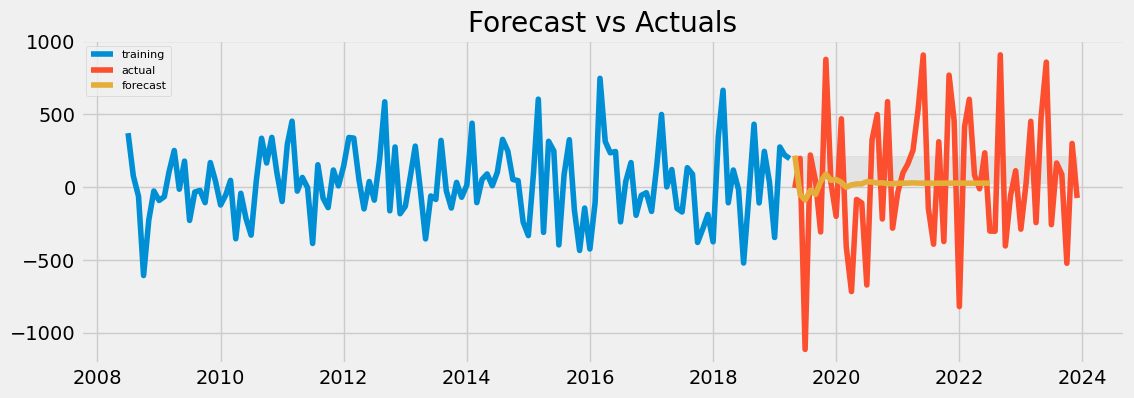

In [103]:
model = ARIMA(train, order=(4, 1, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(39, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[38], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This still doesn't work.

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                  130
Model:                 ARIMA(5, 2, 1)   Log Likelihood                -882.183
Date:                Sun, 21 Jan 2024   AIC                           1778.366
Time:                        19:40:10   BIC                           1798.330
Sample:                    07-01-2008   HQIC                          1786.477
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5918      0.073     -8.079      0.000      -0.735      -0.448
ar.L2         -0.5480      0.095     -5.768      0.000      -0.734      -0.362
ar.L3         -0.3186      0.119     -2.682      0.0

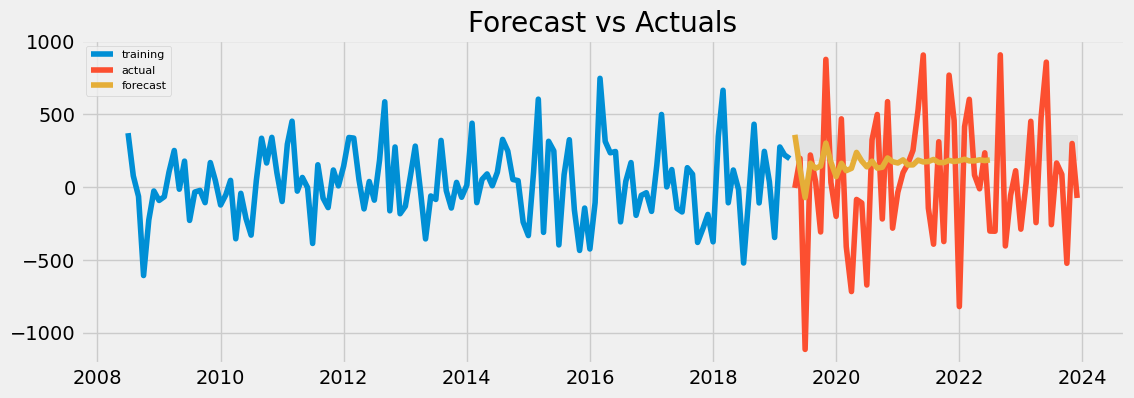

In [106]:
model = ARIMA(train, order=(5, 2, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(39, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[38], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

If I add a second diff, all of the values are significant but the confidence interval is still wrong. 

## Bonus Task Additional Data Set

#### 8a. Defining Parameters
#### 8b. Splitting the Data
#### 8c. Running and Fitting the Model
#### 8d. Iterating

## 8a. Defining Parameters

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 11 must be < 6.

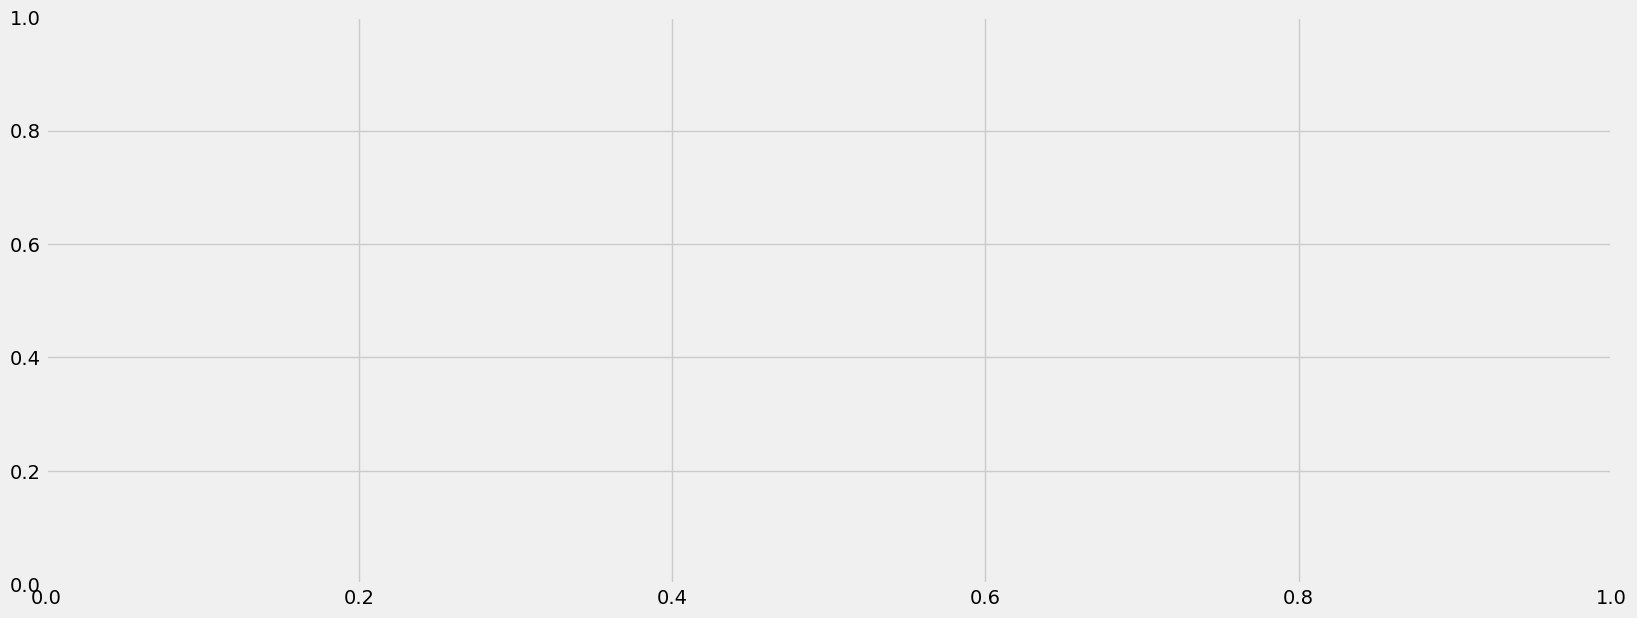

In [117]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(tot_diff3)
plt.figure(figsize=(5,5), dpi=300)
plt.show()

Not sure why this isn't showing up. I will try p=1.

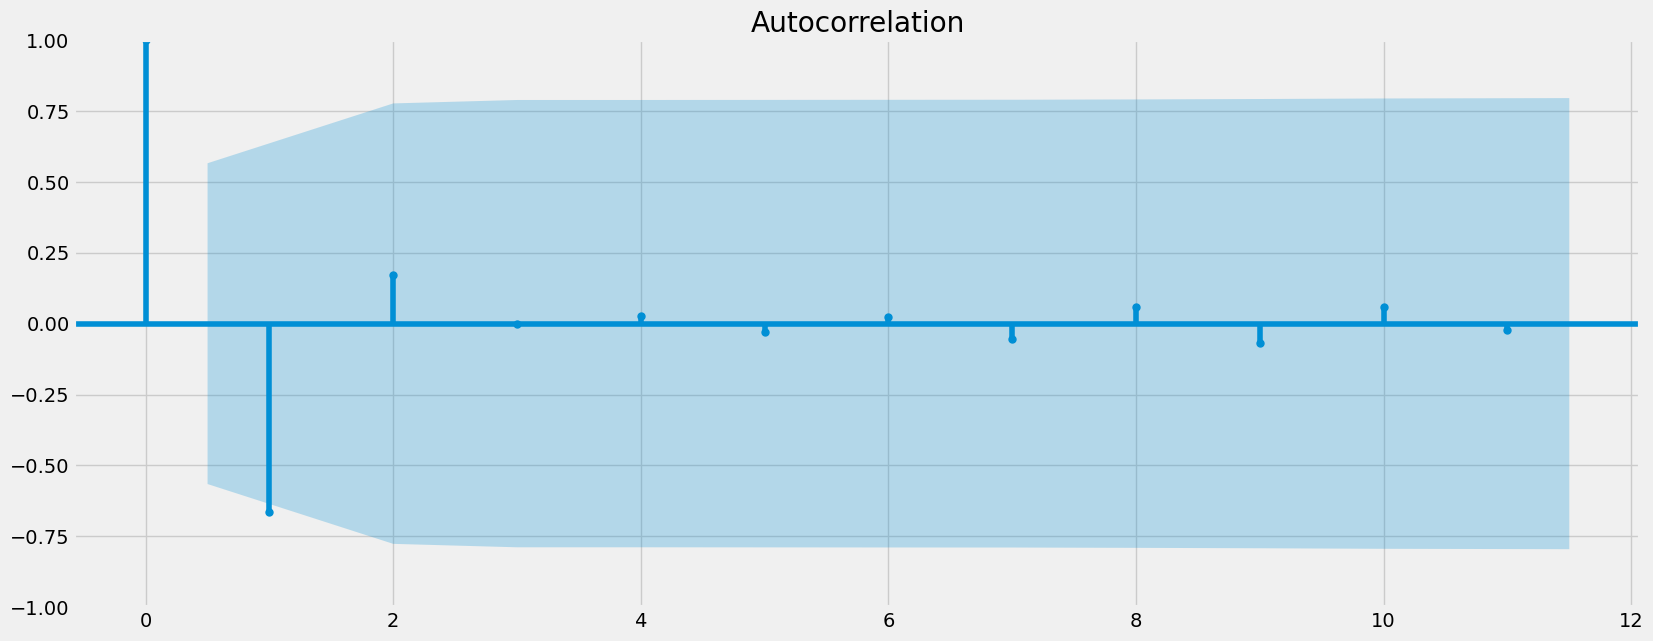

<Figure size 1500x500 with 0 Axes>

In [115]:
# Plot autocorrelations to determine parameter q

plot_acf(tot_diff3)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

There is only 1 lag so I will try q=1.

## 8b. Splitting the Data

In [137]:
# Split the data

train = tot_diff3['population'][:8]
test = tot_diff3['population'][8:]

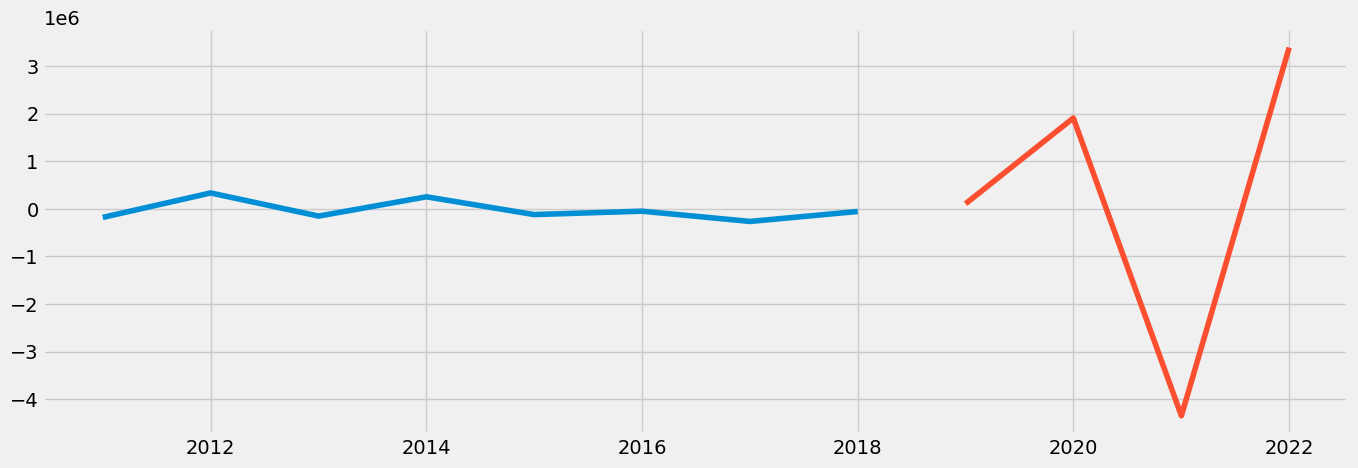

In [138]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [140]:
test.shape

(4,)

## 8c. Running and Fitting the Model

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                    8
Model:                 ARIMA(1, 4, 1)   Log Likelihood                 -62.749
Date:                Sun, 21 Jan 2024   AIC                            131.498
Time:                        19:57:17   BIC                            129.657
Sample:                    01-01-2011   HQIC                           127.457
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7973      7.339     -0.109      0.913     -15.182      13.587
ma.L1         -0.4798    139.844     -0.003      0.997    -274.570     273.610
sigma2      6.674e+12   2.01e-11   3.32e+23      0.0

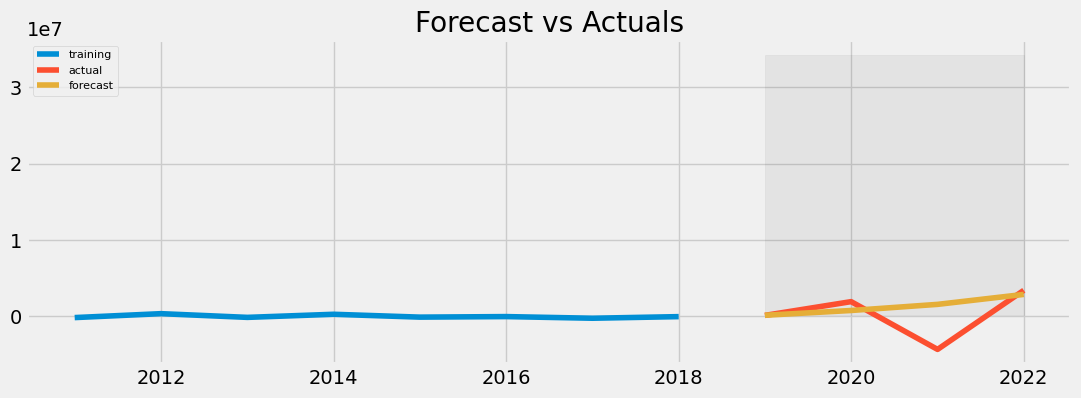

In [141]:
model = ARIMA(train, order=(1, 4, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(12, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 12 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[11], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

There is no significance and the confience interval is off.

## 8d Iterating

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                    8
Model:                 ARIMA(2, 4, 1)   Log Likelihood                 -62.741
Date:                Sun, 21 Jan 2024   AIC                            133.481
Time:                        19:58:36   BIC                            131.027
Sample:                    01-01-2011   HQIC                           128.094
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1960    369.981     -0.003      0.997    -726.346     723.954
ar.L2         -0.3702    318.685     -0.001      0.999    -624.981     624.241
ma.L1         -0.2348   1168.368     -0.000      1.0

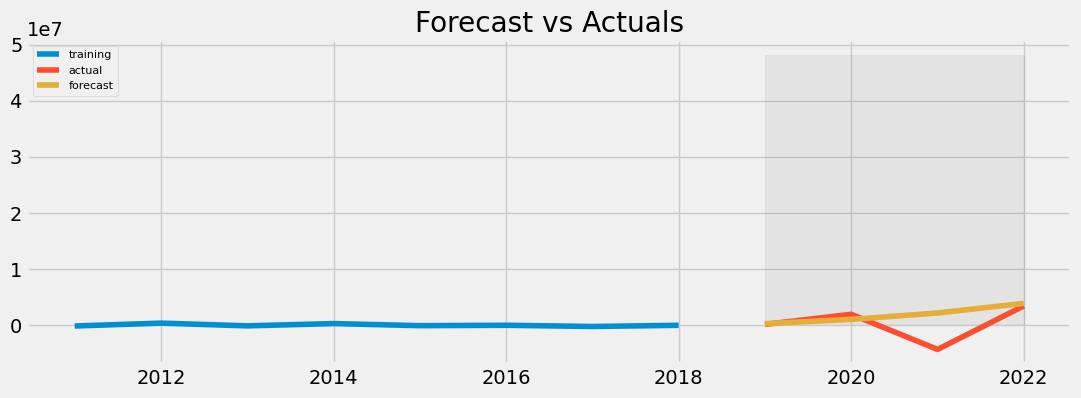

In [142]:
model = ARIMA(train, order=(2, 4, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(12, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 12 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[11], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The significance is worse.

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                    8
Model:                 ARIMA(1, 4, 2)   Log Likelihood                 -61.933
Date:                Sun, 21 Jan 2024   AIC                            131.866
Time:                        19:59:03   BIC                            129.411
Sample:                    01-01-2011   HQIC                           126.479
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7372     12.912     -0.057      0.954     -26.044      24.570
ma.L1         -0.4433    330.105     -0.001      0.999    -647.438     646.551
ma.L2          0.3141    132.575      0.002      0.9

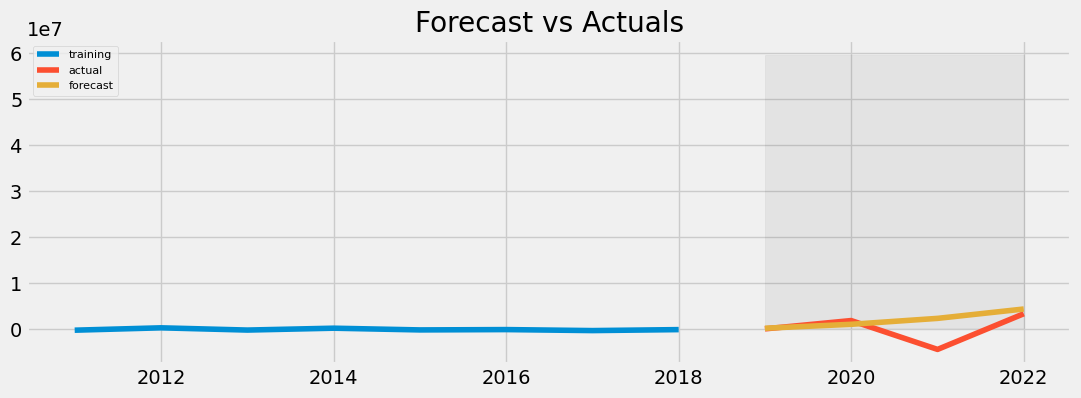

In [143]:
model = ARIMA(train, order=(1, 4, 2))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(12, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 12 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[11], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The significance is still bad.

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                    8
Model:                 ARIMA(2, 4, 2)   Log Likelihood                 -61.931
Date:                Sun, 21 Jan 2024   AIC                            133.861
Time:                        20:00:04   BIC                            130.793
Sample:                    01-01-2011   HQIC                           127.128
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9861   4596.563     -0.000      1.000   -9010.084    9008.112
ar.L2         -0.2139   7766.589  -2.75e-05      1.000   -1.52e+04    1.52e+04
ma.L1         -0.2949   1.11e+05  -2.65e-06      1.0

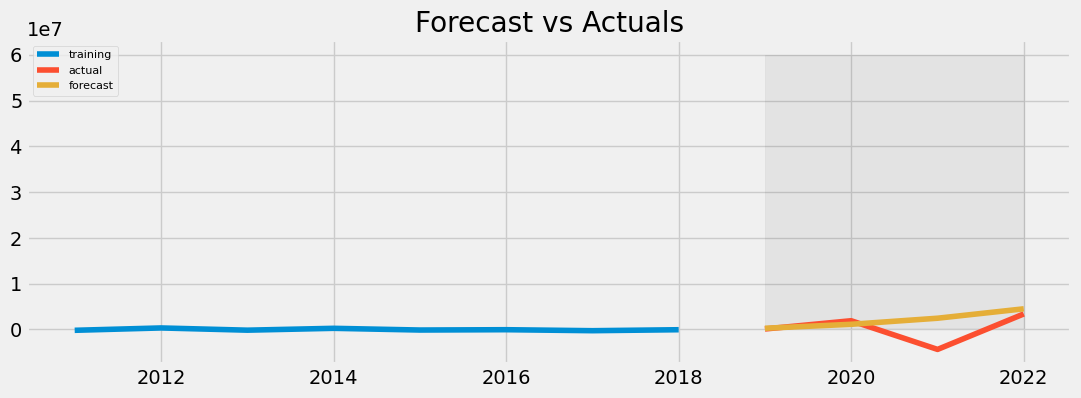

In [145]:
model = ARIMA(train, order=(2, 4, 2))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(12, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 12 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[11], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This is even worse. They're all going to be bad because there was such a difference in population at the start of 2020 and the start of 2021 that would not have been able to be predicted prior to the COVID pandemic.